---
# **<font color='blue'>Trabajo de investigación Doctorado UAI</font>**
---

**Alumno:** Pablo Negro - Gonzalo Zabala - Néstor Balich

**Objetivo:** Analizar los modelos  de la libreria sklean aplicandola directamente y con la función pipe

**Parte 2**
* Lectura de CVS
* Entrenamiento
* Metricas
* Selección de features
* Clasterizado


**Machine Learning supervisado**
En esta modalidad se podría entender como algoritmos que “aprenden” de los datos introducidos por una persona. En este caso:

Se necesita la intervención humana para etiquetar, clasificar e introducir los datos en el algoritmo.

El algoritmo genera datos de salida esperados, ya que en la entrada han sido etiquetados y clasificados por alguien.

Existen dos tipos de datos que pueden ser introducidos en el algoritmo:

**Clasificación:** clasifican un objeto dentro de diversas clases. Por ejemplo, para determinar si un paciente está enfermo o si un correo electrónico es spam.

**Regresión:** predicen un valor numérico. Sería el caso de los precios de una casa al escoger diferentes opciones o la demanda de ocupación de un hotel.

Algunas aplicaciones prácticas de este tipo de Machine Learning:
- La predicción de coste de un siniestro en el caso de las compañías de seguros.

- La detección de fraude bancario por parte de entidades financieras.

- La previsión de avería en la maquinaria de una compañía.


**Machine Learning no supervisado**
A diferencia del caso anterior, no existe la intervención humana en este tipo de Machine Learning. Aquí los algoritmos aprenden de datos con elementos no etiquetados buscando patrones o relaciones entre ellos. En este caso:

Se introducen datos de entrada sin etiquetar.
No necesita la intervención humana.

Existen dos tipos de algoritmos para Machine Learning no supervisado:

**Clustering:** clasifica en grupos los datos de salida. Es el caso de las segmentaciones de clientes según qué hayan comprado.

**Asociación:** descubre reglas dentro del conjunto de datos. Por ejemplo, aquellos clientes que compran un coche también contratan un seguro, por lo que el algoritmo detecta esta regla.


Existen otros casos prácticos en los que se utiliza este tipo de Machine Learning:
- La segmentación del tipo de clientes en un banco (cluster).

- La clasificación del tipo de pacientes en un hospital.

- El sistema de recomendaciones de contenido según el consumo del usuario en plataformas de streaming de vídeo.


In [ ]:
!pip install -qq ipython-autotime
!pip install -qq -U scikit-learn

In [ ]:
%matplotlib inline
%load_ext autotime

time: 140 µs (started: 2021-12-09 12:10:27 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

time: 1.09 s (started: 2021-12-09 12:10:32 +00:00)


# **Lectura de datos CVS**

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/NestorBalich/IA-ML/main/dfscopus.csv"
data_original = pd.read_csv(url, encoding='latin-1', sep=',')

url ="https://raw.githubusercontent.com/NestorBalich/IA-ML/main/df1_lemati_norm.csv"
df1_lemati_norm= pd.read_csv(url, encoding='latin-1', sep=',')

url ="https://raw.githubusercontent.com/NestorBalich/IA-ML/main/df1_stemi_norm.csv"
df1_stemi_norm = pd.read_csv(url, encoding='latin-1', sep=',')

url ="https://raw.githubusercontent.com/NestorBalich/IA-ML/main/df1_cluster_lemati.csv"
cluster_lemati= pd.read_csv(url, encoding='latin-1', sep=',')

url ="https://raw.githubusercontent.com/NestorBalich/IA-ML/main/df1_cluster_stemi.csv"
cluster_stemi = pd.read_csv(url, encoding='latin-1', sep=',')


#**Definición de metricas a utilizar**

**Matriz de confusión**
Una matriz de confusión puede definirse vagamente como una tabla que describe el desempeño de un modelo de clasificación en un conjunto de datos de prueba cuyos valores verdaderos son conocidos. Una matriz de confusión es altamente interpretativa y puede ser usada para estimar un número de otras métricas.

<figure>
<center>
<img src='https://polmartisanahuja.com/wp-content/uploads/2021/01/image-for-post-10-e1610536842121-768x742.png' width="300" height="300" />
<figcaption>Image Caption</figcaption></center>
</figure>


**Exactitud (accuracy)**
La exactitud de la clasificación es la relación entre las predicciones correctas y el número total de predicciones. O más simplemente, con qué frecuencia es correcto el clasificador.

**Precisión(Precision)**
La precisión es la relación entre las predicciones correctas y el número total de predicciones correctas previstas. Esto mide la precisión del clasificador a la hora de predecir casos positivos.

**Sensibilidad(Recall)**
La sensibilidad también es llamada en inglés recall, es la relación entre las predicciones positivas correctas y el número total de predicciones positivas. O más simplemente, cuán sensible es el clasificador para detectar instancias positivas. Esto también se conoce como la tasa verdadera positiva.


**Puntaje de F1**
El puntaje F1 es la medida armónica de la memoria y la precisión, con una puntuación más alta como mejor modelo.

In [ ]:
from sklearn.metrics import confusion_matrix
def matriz_confusion(train, pred,title= "Matriz de confusión"):
    import seaborn as sns
    import matplotlib.pyplot as plt 
    cm = confusion_matrix(train, pred)

    print("\n")
    # plt.figure(figsize=(10,6))  
    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(8, 4))

    # ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

   
    # labels, title and ticks
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Actual'); 

    ax.set_title(f'Confusion Matrix {title}'); 
    ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);
    fig.tight_layout()

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,accuracy_score
def metricas_modelo(Xtrain, Ytrain,train,pred, title="Metricas del modelo",view=0):
    matriz = confusion_matrix(train,pred )
    exactitud = round(100*accuracy_score(train, pred),2)
    precision = round(100*precision_score(train,pred),2)
    sensibilidad = round(100*recall_score(train, pred),2)
    puntaje = round(100*f1_score(train, pred),2)
    error_clasificacion = round(100*(train != pred).mean(),2)
 

    if view == 0 or view == 1:
        print ("\n ********** ",title ," *************")
        print("\nNumber of training samples:", len(Xtrain))
        print("Unlabeled samples in training set:", sum(1 for x in Ytrain if x == -1))
        
        print("\nNumber of test samples:", len(train))
        print("Unlabeled samples in training set:", sum(1 for x in pred if x == -1))
        print(f"\nClassifications true: {(train == pred).sum()}")
        print(f"Classifications false: {(train != pred).sum()}")
        print(f"Classifications error: {error_clasificacion}%")
        print(f"\nF1 score (Puntaje)   : {puntaje}%")
        print(f"Accuracy (Exactitud) : {exactitud}%")
        print(f"Precision (Precision): {precision}%")
        print(f"Recall (Sensibilidad): {sensibilidad}%")
        # print("Matrix confusion: \n", matriz)
    if view == 0 or view == 2:
        matriz_confusion(train, pred,title)

# **Aplicación de modelos**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#modelos
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm  import LinearSVC
from sklearn.semi_supervised import LabelSpreading

### Definimos subset entrenamiento

## Entrenamiento MultinomialNB y LinearSVC

## SVC y NB con lematizado

In [ ]:
# trabajaremos sobre el cluster stemizado normalizado
# extraemos proporsion igual balanceando manualmente

dsEntrenamiento=pd.concat([cluster_stemi[cluster_stemi['include?']==1][0:30],cluster_stemi[cluster_stemi['include?']==0][0:30]], axis=0)
dfSubset=dsEntrenamiento[["text_to_proc", "include?"]]
dfUnseen = cluster_stemi[~cluster_stemi.index.isin(dsEntrenamiento.index)]

In [ ]:
#merificamos propociones 
print(dfSubset.shape)
dfSubset.groupby("include?")["include?"].count()

(60, 2)


include?
0    30
1    30
Name: include?, dtype: int64

In [ ]:
print(dfUnseen.shape)
dfUnseen.groupby("include?")["include?"].count()

(146, 11)


include?
0    91
1    55
Name: include?, dtype: int64

In [ ]:
datos_X = dfSubset['text_to_proc']
datos_y = dfSubset['include?']

X_train, X_test, y_train, y_test = train_test_split(
    datos_X,
    datos_y,
    test_size = 0.2,
    random_state = 42,
    stratify=dfSubset['include?']
)
#porcentaje
import numpy as np
value, counts = np.unique(y_train, return_counts=True)
print("y_train: ", dict(zip(value, 100 * counts / sum(counts))))
value, counts = np.unique(y_test, return_counts=True)
print("y_test: ",dict(zip(value, 100 * counts / sum(counts))))

print("y_train: ", y_test.shape)
print("y_test: ", y_test.shape)

y_train:  {0: 50.0, 1: 50.0}
y_test:  {0: 50.0, 1: 50.0}
y_train:  (12,)
y_test:  (12,)


### Entrenamos modelos

In [ ]:
#vectorizamos y transformamos tdidf para entrenar al modelo
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf_NB = MultinomialNB().fit(X_train_tfidf, y_train)
clf_SVC = LinearSVC().fit(X_train_tfidf, y_train)

### Realizamos predicciones con unseen

In [ ]:
#realizamos predicciones con Unseen
dfPred = dfUnseen.copy()
dfPred["pred_include_NB"] = 0
dfPred["pred_include_SVC"] = 0
for index in dfPred.index:
    aux = dfPred["text_to_proc"][index]
    dfPred["pred_include_NB"][index] = clf_NB.predict(count_vect.transform([aux]))
    dfPred["pred_include_SVC"][index] = clf_SVC.predict(count_vect.transform([aux]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Metricas con SVC


 **********  pred_include_SVC to dfTrain  *************

Number of training samples: 48
Unlabeled samples in training set: 0

Number of test samples: 146
Unlabeled samples in training set: 0

Classifications true: 70
Classifications false: 76
Classifications error: 52.05%

F1 score (Puntaje)   : 57.78%
Accuracy (Exactitud) : 47.95%
Precision (Precision): 41.6%
Recall (Sensibilidad): 94.55%




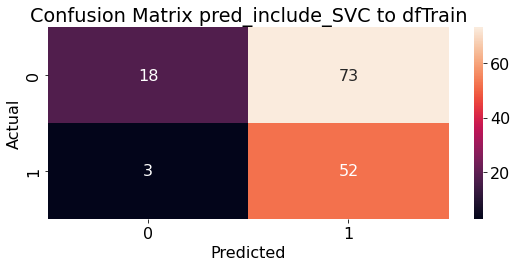

In [ ]:
metricas_modelo(X_train, y_train,dfPred['include?'],dfPred['pred_include_SVC'],"pred_include_SVC to dfTrain")
# print(pd.crosstab(dfPred['include?'], dfPred['pred_include_SVC']))

### Métricas con NB


 **********  pred_include_NB to dfTrain  *************

Number of training samples: 45
Unlabeled samples in training set: 0

Number of test samples: 172
Unlabeled samples in training set: 0

Classifications true: 75
Classifications false: 97
Classifications error: 56.4%

F1 score (Puntaje)   : 51.74%
Accuracy (Exactitud) : 43.6%
Precision (Precision): 35.62%
Recall (Sensibilidad): 94.55%




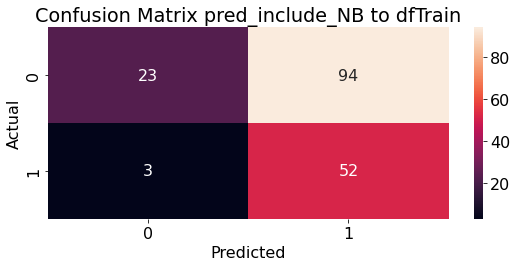

time: 327 ms (started: 2021-12-09 12:12:39 +00:00)


In [ ]:
metricas_modelo(X_train, y_train,dfPred['include?'],dfPred['pred_include_NB'],"pred_include_NB to dfTrain")
# print(pd.crosstab(dfPred['include?'], dfPred['pred_include_NB']))

LVM toma el contexto de las plabras mientras NB las trata individualmente
entonces quizas LVM funciones mejor con lematizacion !!!

https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34



 **********  pred_include_SVC to dfTrain  *************

Number of training samples: 45
Unlabeled samples in training set: 0

Number of test samples: 172
Unlabeled samples in training set: 0

Classifications true: 77
Classifications false: 95
Classifications error: 55.23%

F1 score (Puntaje)   : 52.26%
Accuracy (Exactitud) : 44.77%
Precision (Precision): 36.11%
Recall (Sensibilidad): 94.55%


pred_include_SVC   0   1
include?                
0                 25  92
1                  3  52


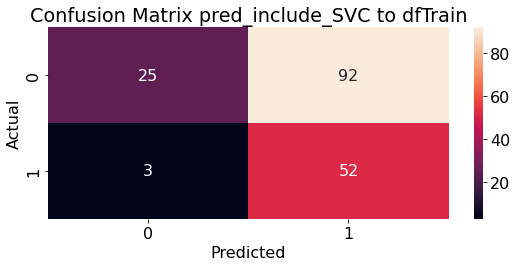

time: 321 ms (started: 2021-12-09 12:12:44 +00:00)


In [ ]:
metricas_modelo(X_train, y_train,dfPred['include?'],dfPred['pred_include_SVC'],"pred_include_SVC to dfTrain")
print(pd.crosstab(dfPred['include?'], dfPred['pred_include_SVC']))

## SVM y NB con estemizado

### Definimos subset entrenamiento

In [ ]:
dsEntrenamiento=pd.concat([df_este[df_este['include?']==1][0:30],df_este[df_este['include?']==0][0:30]], axis=0 )
dfSubset=dsEntrenamiento[["text_to_proc", "include?"]]
dfUnseen = df_este[~df_este.index.isin(dfSubset.index)]

time: 9.48 ms (started: 2021-12-09 12:16:38 +00:00)


### Entrenamos modelos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfSubset['text_to_proc'], dfSubset['include?'], random_state = 42)

#vectorizamos y transformamos tdidf para entrenar al modelo
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf_NB = MultinomialNB().fit(X_train_tfidf, y_train)
clf_SVC = LinearSVC().fit(X_train_tfidf, y_train)

time: 26.3 ms (started: 2021-12-09 12:16:43 +00:00)


### Realizamos predicciones con unseen

In [ ]:
#realizamos predicciones con df_cluster
dfPred = dfUnseen.copy()
dfPred["pred_include_NB"] = 0
dfPred["pred_include_SVC"] = 0
for index in dfPred.index:
    aux = dfPred["text_to_proc"][index]
    dfPred["pred_include_NB"][index] = clf_NB.predict(count_vect.transform([aux]))
    dfPred["pred_include_SVC"][index] = clf_SVC.predict(count_vect.transform([aux]))

time: 174 ms (started: 2021-12-09 12:16:46 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Metricas con SVC


 **********  pred_include_SVC to dfTrain  *************

Number of training samples: 45
Unlabeled samples in training set: 0

Number of test samples: 146
Unlabeled samples in training set: 0

Classifications true: 70
Classifications false: 76
Classifications error: 52.05%

F1 score (Puntaje)   : 57.3%
Accuracy (Exactitud) : 47.95%
Precision (Precision): 41.46%
Recall (Sensibilidad): 92.73%




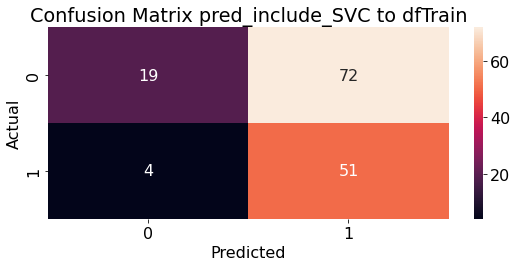

time: 285 ms (started: 2021-12-09 12:16:50 +00:00)


In [ ]:
metricas_modelo(X_train, y_train,dfPred['include?'],dfPred['pred_include_SVC'],"pred_include_SVC to dfTrain")
# print(pd.crosstab(dfPred['include?'], dfPred['pred_include_SVC']))

### Metricas con NB


 **********  pred_include_NB to dfTrain  *************

Number of training samples: 45
Unlabeled samples in training set: 0

Number of test samples: 146
Unlabeled samples in training set: 0

Classifications true: 63
Classifications false: 83
Classifications error: 56.85%

F1 score (Puntaje)   : 55.61%
Accuracy (Exactitud) : 43.15%
Precision (Precision): 39.39%
Recall (Sensibilidad): 94.55%


pred_include_NB   0   1
include?               
0                11  80
1                 3  52


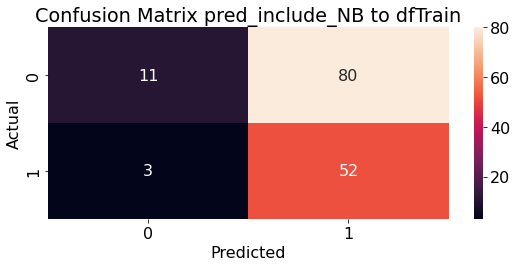

time: 272 ms (started: 2021-12-09 02:01:22 +00:00)


In [ ]:
metricas_modelo(X_train, y_train,dfPred['include?'],dfPred['pred_include_NB'],"pred_include_NB to dfTrain")
print(pd.crosstab(dfPred['include?'], dfPred['pred_include_NB']))